In [15]:
#build graph1 

%pip install networkx
%pip install scipy

import networkx as nx
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import time

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
def time(func):
    start = time.time()
    func()
    end = time.time()
    elapsed_time = end - start
    print(f"executed in: {elapsed_time:.4f} seconds")
    

In [6]:
cwd = os.getcwd()
path= "/".join(list(cwd.split('/')[0:-1])) 
graph1_df = pd.read_csv(path+'/datasets/graph_1_movies_cit.csv')
graph1_df


,Unnamed: 0,movie,movie_country,cites,cites_country,title,year,tconst,titleType,genres,cit,country_cit,primaryTitle_cit,year_cit,tconst_cit,titleType_cit,genres_cit
0,0,#FromJennifer (2017),USA,2 Jennifer (2016),USA,#FromJennifer,2017.0,tt5611424,movie,"Comedy,Horror,Thriller",2 Jennifer (2016),USA,2 Jennifer,2016.0,tt4627224,movie,Horror
1,1,#FromJennifer (2017),USA,To Jennifer (2013),USA,#FromJennifer,2017.0,tt5611424,movie,"Comedy,Horror,Thriller",To Jennifer (2013),USA,To Jennifer,2013.0,tt2630300,movie,"Horror,Thriller"
2,2,#Rip (2013),USA,"Love, Simple (2012)",USA,#Rip,2013.0,tt1900964,movie,Musical,"Love, Simple (2012)",USA,"Love, Simple",2012.0,tt1153698,movie,"Comedy,Romance"
3,3,#Rip (2013),USA,"Love, Simple (2012)",USA,#Rip,2013.0,tt2290968,movie,Action,"Love, Simple (2012)",USA,"Love, Simple",2012.0,tt1153698,movie,"Comedy,Romance"
4,4,R.I.P. (2013),USA,Doctor Faustus (1967),UK,R.I.P.,2013.0,tt1900964,movie,Musical,Doctor Faustus (1967),UK,Doctor Faustus,1967.0,tt0062898,movie,"Drama,Horror,Mystery"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219095,219095,X-Men: Dark Phoenix (2018),USA,X-Men: The Last Stand (2006),Canada,X-Men: Dark Phoenix,2018.0,tt6565702,movie,"Action,Adventure,Sci-Fi",X-Men: The Last Stand (2006),Canada,X-Men: The Last Stand,2006.0,tt0376994,movie,"Action,Adventure,Sci-Fi"
219096,219096,X-Men: Dark Phoenix (2018),USA,X-Men: The Last Stand (2006),USA,X-Men: Dark Phoenix,2018.0,tt6565702,movie,"Action,Adventure,Sci-Fi",X-Men: The Last Stand (2006),USA,X-Men: The Last Stand,2006.0,tt0376994,movie,"Action,Adventure,Sci-Fi"
219097,219097,X-Men: Dark Phoenix (2018),USA,X-Men: The Last Stand (2006),UK,X-Men: Dark Phoenix,2018.0,tt6565702,movie,"Action,Adventure,Sci-Fi",X-Men: The Last Stand (2006),UK,X-Men: The Last Stand,2006.0,tt0376994,movie,"Action,Adventure,Sci-Fi"
219098,219098,X-Men: Dark Phoenix (2018),USA,X: First Class (2011),USA,X-Men: Dark Phoenix,2018.0,tt6565702,movie,"Action,Adventure,Sci-Fi",X: First Class (2011),USA,X: First Class,2011.0,tt1270798,movie,"Action,Sci-Fi"


In [7]:
graph1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219100 entries, 0 to 219099
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        219100 non-null  int64  
 1   movie             219100 non-null  object 
 2   movie_country     218934 non-null  object 
 3   cites             219100 non-null  object 
 4   cites_country     219075 non-null  object 
 5   title             219100 non-null  object 
 6   year              219100 non-null  float64
 7   tconst            219100 non-null  object 
 8   titleType         219100 non-null  object 
 9   genres            216603 non-null  object 
 10  cit               219100 non-null  object 
 11  country_cit       219075 non-null  object 
 12  primaryTitle_cit  219100 non-null  object 
 13  year_cit          219100 non-null  float64
 14  tconst_cit        219100 non-null  object 
 15  titleType_cit     219100 non-null  object 
 16  genres_cit        21

In [8]:
g1 = nx.DiGraph()



for row in graph1_df.itertuples():
    # Add movie- type attribute
    g1.add_node(row.movie, type='movie')
    
    # Add movie_country node
    if pd.notna(row.movie_country):
        g1.add_node(row.movie_country, type='country')
        g1.add_edge(row.movie, row.movie_country)
    
    # Add cites 
    if pd.notna(row.cites):
        g1.add_node(row.cites, type='movie')
        
        # Add cites_country node 
        if pd.notna(row.cites_country):
            g1.add_node(row.cites_country, type='country')
            g1.add_edge(row.cites, row.cites_country)
            
            # add edges from movie to cites
            g1.add_edge(row.movie, row.cites)



In [9]:
g1

In [10]:
len(list(g1.nodes))


50446

In [11]:
#testing
list(g1.edges)

# att = nx.get_node_attributes(g1,'cites_country')

list(g1.adj['Alien (1979)'])

['UK',
 'USA',
 '2001: A Space Odyssey (1968)',
 'Dark Star (1974)',
 'Erinnerungen an die Zukunft (1970)',
 'Ikarie XB 1 (1963)',
 'It! The Terror from Beyond Space (1958)',
 'Jaws (1975)',
 'Night of the Living Dead (1968)',
 'Rabid (1977)',
 'Shivers (1975)',
 "Singin' in the Rain (1952)",
 'Terrore nello spazio (1965)',
 'The Texas Chain Saw Massacre (1974)']

In [13]:
nx.write_gexf(g1, '/graph_files/g1.gexf')



FileNotFoundError: [Errno 2] No such file or directory: '/graph_files/g1.gexf'

In [29]:
#SECOND APPROACH 

movies_filtered = pd.read_csv(path+'/datasets/filtered_graph1_data.csv')

g2 = nx.DiGraph()
# add nodes and attributes 
for row in movies_filtered.itertuples():
    if not pd.isna(row.movie_country):
        if g2.has_node(row.movie):
            existing_attrs = g2.nodes[row.movie]
            if 'country' in existing_attrs:
                # check if country is already in list before appending
                if row.movie_country not in existing_attrs['country']:
                    existing_attrs['country'].append(row.movie_country)
            else:
                # create new country list
                g2.nodes[row.movie]['country'] = [row.movie_country]
        else:
            g2.add_node(row.movie, country=[row.movie_country])
                    # add edges from movie to cites
        g2.add_edge(row.movie, row.cites)
            
    if not pd.isna(row.cites_country):
        if g2.has_node(row.cites):
            existing_attrs = g2.nodes[row.cites]
            if 'country' in existing_attrs:
                # check if country is already in list before appending
                if row.cites_country not in existing_attrs['country']:
                    existing_attrs['country'].append(row.cites_country)
            else:
                # create new country list
                g2.nodes[row.cites]['country'] = [row.cites_country]
        else:
            g2.add_node(row.cites, country=[row.cites_country])


In [30]:
g2



In [32]:
#testing

# list(g2.edges)


In [36]:

# convert the 'country' attribute from list to string
for node in g2.nodes:
    if 'country' in g2.nodes[node]:
        g2.nodes[node]['country'] = ','.join(g2.nodes[node]['country'])



In [37]:
len(g2.edges)

86944

In [38]:
list(g2.adj['Alien (1979)'])

['2001: A Space Odyssey (1968)',
 'Dark Star (1974)',
 'It! The Terror from Beyond Space (1958)',
 'Jaws (1975)',
 'Night of the Living Dead (1968)',
 "Singin' in the Rain (1952)",
 'The Texas Chain Saw Massacre (1974)']

In [42]:
nx.write_gexf(g2, path+'/graph_files/graph-movie-cit.gexf')


In [44]:
att = nx.get_node_attributes(g2,'country')
att

{'#FromJennifer (2017)': 'USA',
 '2 Jennifer (2016)': 'USA',
 'To Jennifer (2013)': 'USA',
 '#Rip (2013)': 'USA',
 'Love, Simple (2012)': 'USA',
 '#chicagoGirl: The Social Network Takes on a Dictator (2013)': 'USA',
 'The Godfather (1972)': 'USA',
 '$10 Raise (1935)': 'USA',
 'The Ten Dollar Raise (1921)': 'USA',
 '$5 a Day (2008)': 'USA',
 'Old Yeller (1957)': 'USA',
 'The Great Escape (1963)': 'USA',
 '$ellebrity (2012)': 'USA',
 'Avatar (2009)': 'USA',
 'The Dark Knight (2008)': 'USA',
 'Iron Man 2 (2010)': 'USA',
 "'94 du bi dao zhi qing (1994)": 'Hong Kong',
 'Du bei dao (1967)': 'Hong Kong',
 "'A' gai wak (1983)": 'Hong Kong',
 'Bao chou (1970)': 'Hong Kong',
 'Modern Times (1936)': 'USA',
 'Safety Last! (1923)': 'USA',
 "'A' gai wak 2 (1987)": 'Hong Kong',
 'Steamboat Bill, Jr. (1928)': 'USA',
 "'Crocodile' Dundee II (1988)": 'USA',
 'Bonnie and Clyde (1967)': 'USA',
 'Superman III (1983)': 'USA',
 "'Kurenai no kenjû' yo eien ni (2000)": 'Japan',
 'Kurenai no kenju (1961)': 'Jap

In [ ]:
#APPLYING MEASURES ON NETWORK GRAPH

In [44]:
PageRank=nx.pagerank(g1, 0.85)
PageRank
#Now, we have a dictionary of nodes with PageRank as values.

{'#FromJennifer (2017)': 8.755874722688107e-06,
 'USA': 0.14489755633869986,
 '2 Jennifer (2016)': 1.1065313618273737e-05,
 'To Jennifer (2013)': 1.565199564497041e-05,
 '#Rip (2013)': 8.755874722688107e-06,
 'Love, Simple (2012)': 1.222003306606655e-05,
 'R.I.P. (2013)': 8.755874722688107e-06,
 'Doctor Faustus (1967)': 1.222003306606655e-05,
 'UK': 0.01927292857718675,
 '#TubeClash02 (2016)': 8.755874722688107e-06,
 'Germany': 0.014934150994840207,
 'Star Wars (1977)': 0.0016907619711304662,
 '#chicagoGirl: The Social Network Takes on a Dictator (2013)': 8.755874722688107e-06,
 'The Godfather (1972)': 0.0008614564256441751,
 'Syria': 1.4760415851210745e-05,
 '$10 Raise (1935)': 8.755874722688107e-06,
 'The Ten Dollar Raise (1921)': 1.222003306606655e-05,
 '$5 a Day (2008)': 8.755874722688107e-06,
 'Old Yeller (1957)': 4.4843941202770924e-05,
 'The Great Escape (1963)': 0.0001598973236875063,
 '$ellebrity (2012)': 8.755874722688107e-06,
 'Avatar (2009)': 7.29304816505555e-05,
 'The Dar

In [52]:
def page_rank(G, d=0.85, tol=1e-2, max_iter=100):
    """Return the PageRank of the nodes in the graph. 

    :param dict G: the graph
    :param float d: the damping factor
    :param flat tol: tolerance to determine algorithm convergence
    :param int max_iter: max number of iterations
    """
    nodes = G.nodes()
    matrix = nx.adjacency_matrix(G, nodelist=nodes)
    out_degree = matrix.sum(axis=0)
    weight = matrix / out_degree
    N = G.number_of_nodes()
    pr = np.ones(N).reshape(N, 1) * 1./N

    # need to repeat the initial step twice
    # for matplotlib animation
    yield nodes, pr, "init"
    yield nodes, pr, "init"

    for it in range(max_iter):
        old_pr = pr[:]
        pr = d * weight.dot(pr) + (1-d)/N
        yield nodes, pr, it
        err = np.absolute(pr - old_pr).sum()
        if err < tol:
            return pr
    #raise Exception(f'PageRank failed after max iteration = {max_iter} (err={err} > tol = {tol})')

def update(r):
    res_nodes, res_values, it = r
    res_values = np.asarray(res_values).ravel()
    plt_nodes = nx.draw_networkx_nodes(
        G, pos,
        ax=ax,
        nodelist=res_nodes,
        node_color=res_values,
        alpha=1,
        node_size=700,
        cmap=plt.cm.Blues,
        vmin=0,
        vmax=0.2
    )
    ax.axis("off")
    ax.set_title(f"Iteration {it}")
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=14)
    return [plt_nodes, ]



G = nx.read_edgelist("../graph_files/g1.edgelist")
pos = nx.kamada_kawai_layout(G)

f, ax = plt.subplots()
ani = FuncAnimation(
    f,
    update,
    frames=page_rank(G),
    interval=1000,
    blit=True
)
f.suptitle(f"  Page Rank")
ani.save("graph_pr.gif", writer='imagemagick')

TypeError: Failed to convert edge data (['(2016)', 'USA', '{}']) to dictionary.

In [42]:
import collections
d = collections.defaultdict(int)
def bc(G):
    vertices = G.nodes()
    new_bc = {}
    paths = d(dict)

    # Get shortest paths between all pairs of vertices
    for i, vertex in enumerate(vertices[:-1]):
        for o_vertex in vertices[i+1:]:
            paths[vertex][o_vertex] = [path for path in
                                       nx.all_shortest_paths(G, vertex, o_vertex)]

    for vertex in vertices:
        counter = 0
        for i, vertex1 in enumerate(vertices[:-1]):
            for vertex2 in vertices[i+1:]:
                for path in paths[vertex1][vertex2]:
                    if vertex in path[1:-1]:
                        counter += 1
        new_bc[vertex] = counter

    return new_bc
bet=bc(g2)
print (bet)

TypeError: 'collections.defaultdict' object is not callable

In [46]:
b=nx.betweenness_centrality(g1)
print(b)

KeyboardInterrupt: 

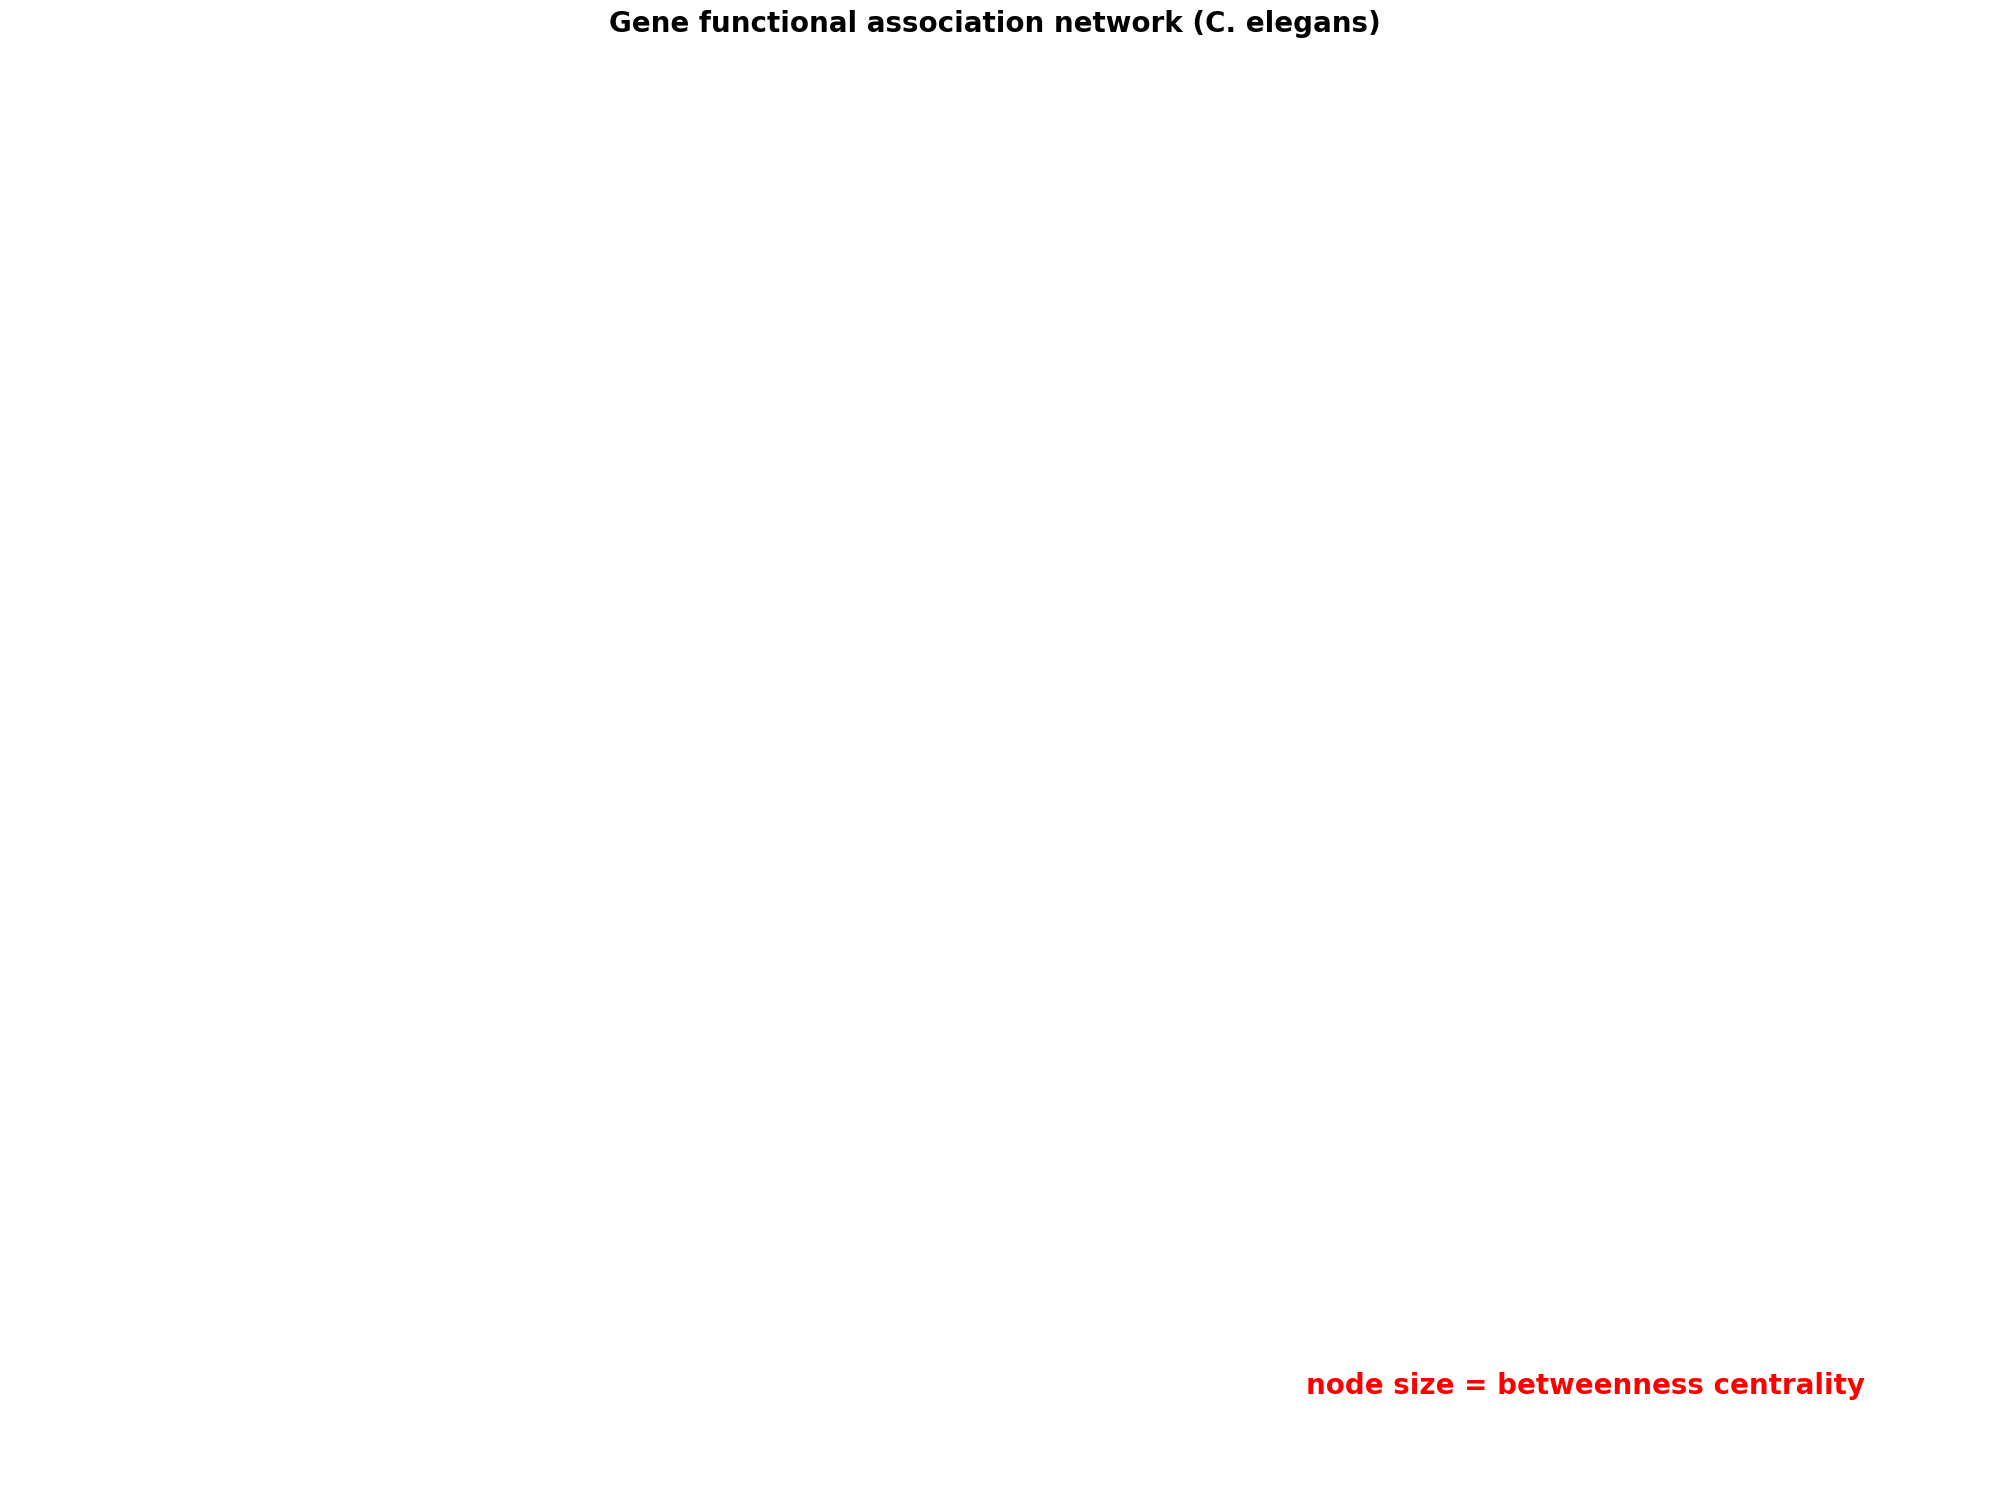

In [58]:
H = g2

# compute centrality
centrality = nx.betweenness_centrality(H, k=1000, endpoints=True)

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.circular_layout(H)
node_color = ['blue']
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.06,
    "node size = betweenness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readability
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()